<a href="https://colab.research.google.com/github/saks0106/DL_Frequent_Lookout/blob/main/2_OverFitting_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handling Overfitting In Deep Neural Network

This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a **binary classification problem** that requires a model to differentiate rocks from metal cylinders.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/sonar.csv", header=None, skiprows = 1)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
55,0.0201,0.0116,0.0123,0.0245,0.0547,0.0208,0.0891,0.0836,0.1335,0.1199,...,0.0076,0.0045,0.0056,0.0075,0.0037,0.0045,0.0029,0.0008,0.0018,Rock
21,0.0664,0.0575,0.0842,0.0372,0.0458,0.0771,0.0771,0.1130,0.2353,0.1838,...,0.0141,0.0190,0.0043,0.0036,0.0026,0.0024,0.0162,0.0109,0.0079,Rock
141,0.0707,0.1252,0.1447,0.1644,0.1693,0.0844,0.0715,0.0947,0.1583,0.1247,...,0.0156,0.0197,0.0135,0.0127,0.0138,0.0133,0.0131,0.0154,0.0218,Mine
126,0.0715,0.0849,0.0587,0.0218,0.0862,0.1801,0.1916,0.1896,0.2960,0.4186,...,0.0153,0.0121,0.0096,0.0196,0.0042,0.0066,0.0099,0.0083,0.0124,Mine
164,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,...,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033,Mine


In [ ]:
X = df.drop(60, axis=1)
y = df[60]
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: 60, dtype: object

In [ ]:
y.value_counts()

Mine    111
Rock     97
Name: 60, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

_, x_val,_, y_val = train_test_split(X_test,y_test, test_size=0.25, random_state=1) 

# Using Deep Learning Model

## Building Our NN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 21ms/step - loss: 0.6931 - accuracy: 0.5413 - val_loss: 0.6765 - val_accuracy: 0.5319
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.5872 - val_loss: 0.6631 - val_accuracy: 0.5532
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6498 - accuracy: 0.6147 - val_loss: 0.6458 - val_accuracy: 0.5957
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6336 - accuracy: 0.6606 - val_loss: 0.6261 - val_accuracy: 0.6596
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6166 - accuracy: 0.6606 - val_loss: 0.6004 - val_accuracy: 0.7660
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5951 - accuracy: 0.7431 - val_loss: 0.5724 - val_accuracy: 0.8085
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5927 - accuracy: 0.6697 - val_loss: 0.5500 - val_accuracy: 0.7660
Epoch 8/100


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 7ms/step - loss: 1.1488 - accuracy: 0.8077
Test Accuracy:  80.7692289352417


In [ ]:
loss, acc = model.evaluate(X_train, y_train)
print('Training Accuracy: ', acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.9551
Training Accuracy:  95.51281929016113


Our model is overfitting

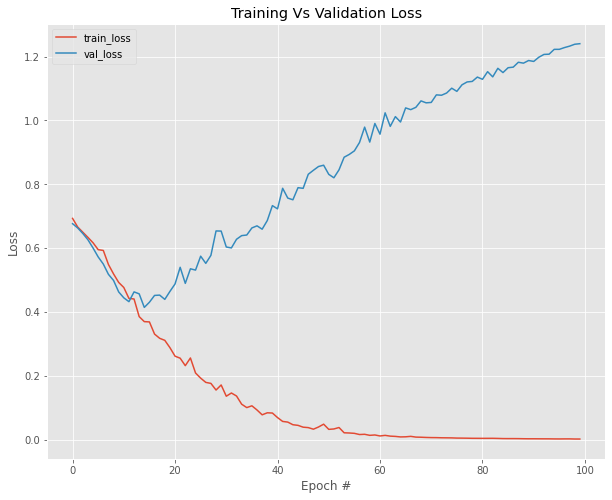

In [ ]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Fixing Overfitting


There are many techniques that we can employ to fix the problem of overfitting.
Below are the most common and recommended ones:


1. Simplify the complexity of the model  
2. L2 Regularization
2.   Drop Out
3. Early Stopping
4. Data Augmentation




1. **Simplify the complexity of the model**

The first step when dealing with overfitting is to decrease the complexity of the model. To decrease the complexity, we can simply remove layers or reduce the number of neurons to make the network smaller. While doing this, it is important to calculate the input and output dimensions of the various layers involved in the neural network. There is no general rule on how much to remove or how large your network should be. But, if your neural network is overfitting, try making it smaller.



2. **L2 Regularization**

L2 regularization introduces a new cost function by adding a penalty term to a loss function called an L2 weight penalty.

It is also known as weight decay as it pushes the values of the weights towards zero (but not zero).


in Squared Error - > y - y_hat ie Cost fn, Optimizers are used to BackProp and adjust and weight and biases to get min cost fn


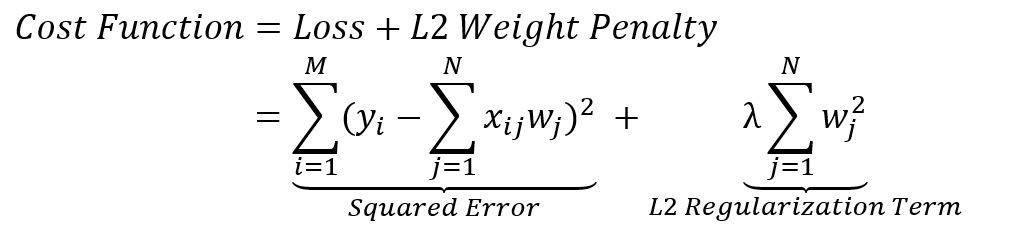

#**Drop Out**

Regularization techniques prevent the model from overfitting by modifying the cost function. Dropout, on the other hand, prevents overfitting by modifying the network itself. It works as follows. Every neuron apart from the ones in the output layer is assigned a probability p of being temporarily ignored from calculations. p is also called dropout rate and is usually initialized to 0.5. Then, as each iteration progresses, the neurons in each layer with the highest probability get dropped. This results in creating a smaller network with each epoch. Since in each iteration, a random input value can be eliminated, the network tries to balance the risk and not to favour any of the features and reduces bias and noise. 

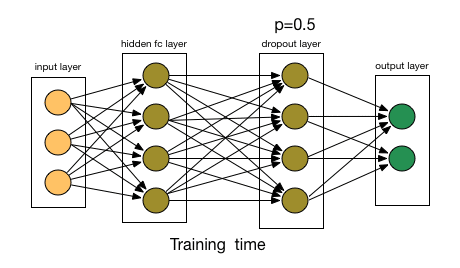

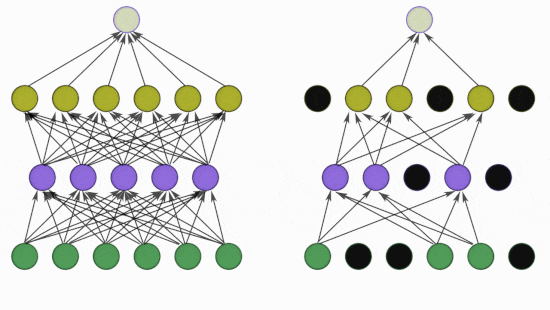

<br>


# Adding L2 Regularization from Keras

In [ ]:
#kernel_regularizer=tf.keras.regularizers.l2(0.1)



model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)), #lambda value
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 7.0232 - accuracy: 0.4404 - val_loss: 6.3302 - val_accuracy: 0.5106
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 5.8154 - accuracy: 0.5229 - val_loss: 5.2349 - val_accuracy: 0.6170
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 4.8060 - accuracy: 0.6697 - val_loss: 4.3272 - val_accuracy: 0.5745
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 3.9755 - accuracy: 0.6422 - val_loss: 3.5823 - val_accuracy: 0.5957
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 3.2970 - accuracy: 0.7156 - val_loss: 2.9800 - val_accuracy: 0.7234
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 2.7483 - accuracy: 0.7523 - val_loss: 2.4910 - val_accuracy: 0.7021
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 2.3178 - accuracy: 0.6055 - val_loss: 2.0992 - val_accuracy: 0.7234
Epoch 8/100


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 6ms/step - loss: 0.9077 - accuracy: 0.7115
Test Accuracy:  71.15384340286255


In [ ]:
loss, acc = model.evaluate(X_train, y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.8205
Test Accuracy:  82.05128312110901


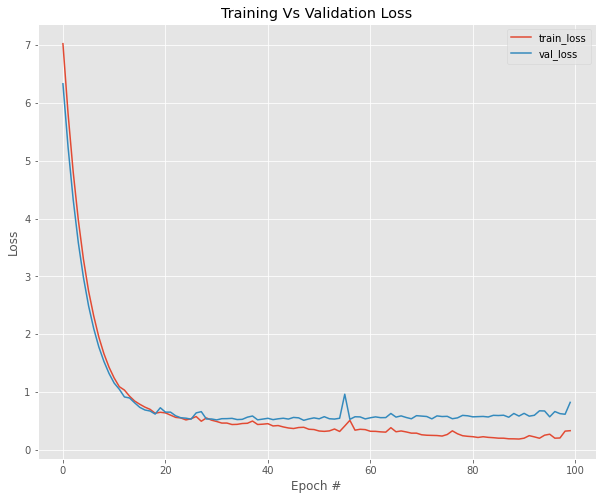

In [ ]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

## Model with Dropout Layer and Regularization





# Adding dropout and regularization

In [ ]:
#kernel_regularizer=tf.keras.regularizers.l2(0.1)



model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    
    keras.layers.Dense(30, activation='relu'),
    
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 28ms/step - loss: 6.9191 - accuracy: 0.4679 - val_loss: 6.2236 - val_accuracy: 0.6170
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 5.7266 - accuracy: 0.6147 - val_loss: 5.1623 - val_accuracy: 0.5957
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 4.7576 - accuracy: 0.6147 - val_loss: 4.2832 - val_accuracy: 0.5532
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 3.9440 - accuracy: 0.6789 - val_loss: 3.5594 - val_accuracy: 0.6596
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 3.2850 - accuracy: 0.6606 - val_loss: 2.9679 - val_accuracy: 0.8085
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 2.7366 - accuracy: 0.7064 - val_loss: 2.4899 - val_accuracy: 0.6596
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 2.3055 - accuracy: 0.6881 - val_loss: 2.0980 - val_accuracy: 0.7872
Epoch 8/100


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 11ms/step - loss: 0.7198 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


In [ ]:
loss, acc = model.evaluate(X_train, y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.9231
Test Accuracy:  92.30769276618958


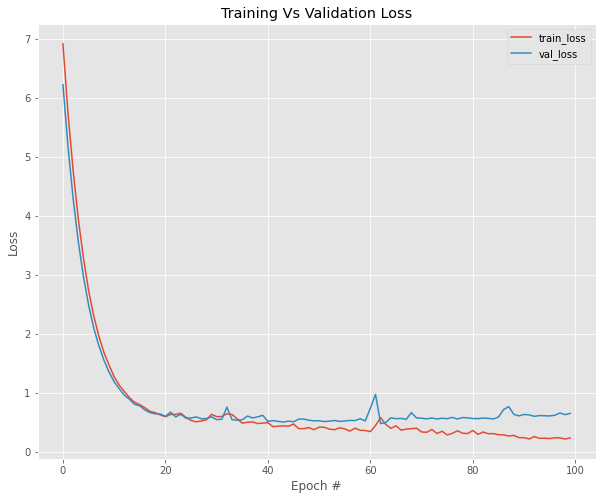

In [ ]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Early Stopping

 Early stopping is a technique that can avoid over-training and hence overfitting of the model. An over-trained model has a tendency to memorize all the training data points. With early stopping, a large arbitrary number of training epochs is specified. The model is stopped from training further when the model performance stops improving on the validation dataset.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    
    keras.layers.Dense(30, activation='relu'),
    
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, 
              y_train, 
              epochs=100, 
              batch_size=8, 
              validation_split=0.3,
              callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',verbose=1, patience=5) 
              # patience =5 means if no improvement after next 5 epochs, stop
)


Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 7.0797 - accuracy: 0.5321 - val_loss: 6.3835 - val_accuracy: 0.5319
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 5.8798 - accuracy: 0.5413 - val_loss: 5.2883 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 4.8691 - accuracy: 0.5780 - val_loss: 4.3806 - val_accuracy: 0.6170
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 4.0348 - accuracy: 0.6147 - val_loss: 3.6376 - val_accuracy: 0.5745
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 3.3564 - accuracy: 0.5963 - val_loss: 3.0276 - val_accuracy: 0.6383
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 2.8048 - accuracy: 0.6606 - val_loss: 2.5379 - val_accuracy: 0.6383
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 2.3605 - accuracy: 0.6055 - val_loss: 2.1416 - val_accuracy: 0.6170
Epoch 8/100


In [ ]:

loss, acc=model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 7ms/step - loss: 0.5987 - accuracy: 0.7500
Test Accuracy:  75.0


In [ ]:

loss, acc = model.evaluate(X_train, y_train)
print('Training Accuracy: ', acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.8205
Training Accuracy:  82.05128312110901


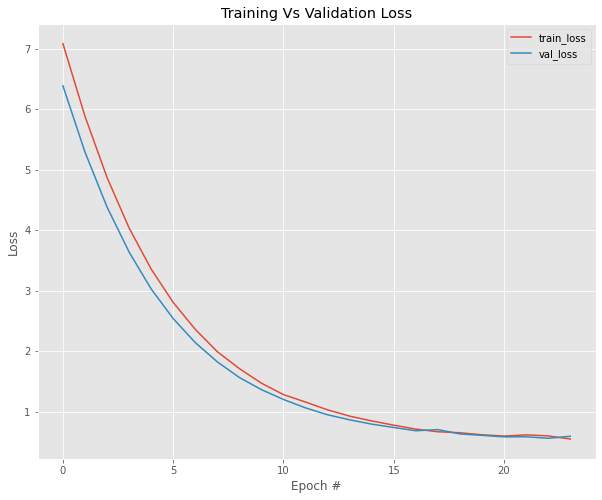

In [ ]:

import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")
# (fig, axs) = plt.subplots(2, 1)
# plot the *unshifted* training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# ModelCheckpoint Callback - improved epoch is stored

A good application of checkpointing is to serialize your network to disk each time there is an improvement during training. We define an “improvement” to be either a decrease in loss or an increase in accuracy — we’ll set this parameter inside the actual Keras callback.


ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

A few options this callback provides include:

1. Whether to only keep the model that has achieved the "best performance" so far, or whether to save the model at the end of every epoch regardless of performance.
2. Definition of 'best'; which quantity to monitor and whether it should be maximized or minimized.
3. The frequency it should save at. Currently, the callback supports saving at the end of every epoch, or after a fixed number of training batches.
4. Whether only weights are saved, or the whole model is saved.





In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint

model = keras.Sequential([
keras.layers.Dense(80, input_dim=60, activation='relu'),
keras.layers.Dense(30, activation='relu'),
keras.layers.Dense(15, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('SOMETHINGELSE', monitor="val_loss", mode="min",
	save_best_only=True, verbose=1),
# monitor will monitor lowest val_loss  compare to previous val_loss
#SOMETHINGELSE is name
#save_best_only is improved weight
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1, patience=5)
callbacks = [checkpoint,earlystopping]


H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3,callbacks=callbacks) 
#To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number., Add "patience" to wait for sometime before stopping after the best accuracy or val_loss has been found.


2/2 [==============================] - 0s 10ms/step - loss: 0.5655 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


#Load best weight 

In [ ]:
model = keras.Sequential([
keras.layers.Dense(80, input_dim=60, activation='relu'),
keras.layers.Dense(30, activation='relu'),
keras.layers.Dense(15, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.load_weights("/content/SOMETHINGELSE") #best weight
print(model.evaluate(X_test, y_test))

2/2 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.7308
[0.4917621612548828, 0.7307692170143127]
